# Titanic Case Study

# Variable Notes

- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.

# Perform followings on dataset:
- Read the dataset and display top/bottom rows
- Get a summary of whole dataset
- Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?
- Drop those columns which needs to be dropped
- Find out the data type of each column
- Find out the number of entries in each column
- Find out which columns is having more number of missing values
- Replace missing values in each column and provide the reason for choosing one function to replace missing values
- Fix the issue with fare column usign regex flag then type casting of the whole column 
- Find out total number of Male/Female passengers
- Find out total number of passengers in each passenger class
- Find out total number of Survived/Not-survived passengers
- Find out total number of passengers of various age groups (0-30, 31-60 and >60)
- Find out which age group survived
- Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Read the dataset and display top/bottom rows

In [3]:
df = pd.read_csv("titanic_dataset_modified.csv")

In [4]:
df.head(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


##### Get a summary of whole dataset

In [5]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,121.000000
mean,654.000000,2.294882,0.381971,29.881135,0.498854,0.385027,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,97.696922
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,1.000000
25%,327.000000,2.000000,0.000000,21.000000,0.000000,0.000000,72.000000
50%,654.000000,3.000000,0.000000,28.000000,0.000000,0.000000,155.000000
75%,981.000000,3.000000,1.000000,39.000000,1.000000,0.000000,256.000000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,328.000000


In [6]:
df.describe(include="all")

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308,295,1307,486,121.000000,745
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,263,186,3,27,NaN,369
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,$8.05,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,60,6,914,39,NaN,64
mean,654.000000,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,NaN,NaN,NaN,NaN,160.809917,NaN
std,378.020061,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,NaN,NaN,NaN,NaN,97.696922,NaN
min,0.000000,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,327.000000,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,72.000000,NaN
50%,654.000000,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,155.000000,NaN
75%,981.000000,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,256.000000,NaN


##### Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?

In [7]:
# already discussed, please write your assumptions here

##### Drop those columns which needs to be dropped

In [8]:
df.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

In [12]:
# print(df.index.tolist())

In [16]:
df.drop(["Unnamed: 0","name","ticket","cabin","boat","body","home.dest"],axis=1,inplace=True) # inplace will modify original dataframe

In [17]:
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,$211.34,S
1,1,1,male,0.9167,1,2,$151.55,S


##### Find out the data type of each column

In [19]:
df.dtypes

pclass        int64
survived      int64
gender       object
age         float64
sibsp         int64
parch         int64
fare         object
embarked     object
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
gender      1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null object
embarked    1307 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 81.9+ KB


##### Find out the number of entries in each column

In [22]:
# size: will consider empty value as well
# count: will consider only non-empty value

In [21]:
for k in df.columns:
    print("Total number of observations in",k,"is ::",df[k].size)

Total number of observations in pclass is :: 1309
Total number of observations in survived is :: 1309
Total number of observations in gender is :: 1309
Total number of observations in age is :: 1309
Total number of observations in sibsp is :: 1309
Total number of observations in parch is :: 1309
Total number of observations in fare is :: 1309
Total number of observations in embarked is :: 1309


In [24]:
for k in df.columns:
    print("Total number of observations in",k,"is ::",df[k].count())

Total number of observations in pclass is :: 1309
Total number of observations in survived is :: 1309
Total number of observations in gender is :: 1309
Total number of observations in age is :: 1046
Total number of observations in sibsp is :: 1309
Total number of observations in parch is :: 1309
Total number of observations in fare is :: 1308
Total number of observations in embarked is :: 1307


##### Find out which columns is having more number of missing values

In [35]:
df.pclass.isnull().any()

False

In [31]:
df.isnull().sum()

pclass        0
survived      0
gender        0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [30]:
df.age.isnull().sum()

263

In [30]:
df.age.isnull().sum()

263

In [38]:
for k in df.columns:
    print("Total missing values % in",k,"is ::",round(((df[k].isnull().sum())/df.pclass.size)*100),3)

Total missing values % in pclass is :: 0.0 3
Total missing values % in survived is :: 0.0 3
Total missing values % in gender is :: 0.0 3
Total missing values % in age is :: 20.0 3
Total missing values % in sibsp is :: 0.0 3
Total missing values % in parch is :: 0.0 3
Total missing values % in fare is :: 0.0 3
Total missing values % in embarked is :: 0.0 3


##### Replace missing values in each column and provide the reason for choosing one function to replace missing values

###### Age

In [40]:
df.age.mean()

29.8811345124283

In [43]:
df.age.fillna(df.age.mean(),inplace=True)

In [45]:
# to check if replaced or not

In [44]:
df.age.isnull().sum()

0

###### embarked

In [46]:
df.embarked.isnull().sum()

2

In [47]:
df.embarked.dtype

dtype('O')

###### How to get unique value details for categorical column

In [48]:
df.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

###### How to get count of unique values

In [50]:
df.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

###### Lets replace missing value

In [51]:
df.embarked.mode()

0    S
dtype: object

In [53]:
df.embarked.fillna(df.embarked.mode()[0],inplace=True)

In [54]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [55]:
df.embarked.isnull().sum()

0

##### Fix the issue with fare column usign regex flag then type casting of the whole column

In [56]:
df.fare.isnull().sum()

1

In [57]:
df.fare.dtype

dtype('O')

In [58]:
df.fare.head(3)

0    $211.34
1    $151.55
2    $151.55
Name: fare, dtype: object

###### using replace function to remove $

In [62]:
# df.fare.replace({"\s+?":""},regex=True)

In [63]:
df.fare.replace({"\$":""},regex=True,inplace=True)

In [64]:
df.fare.head(3)

0    211.34
1    151.55
2    151.55
Name: fare, dtype: object

###### use typecasting

In [65]:
df.fare = df.fare.astype("float32")

In [66]:
df.fare.head(3)

0    211.339996
1    151.550003
2    151.550003
Name: fare, dtype: float32

###### replace missing valye in fare

In [67]:
df.fare.fillna(df.fare.mean(),inplace=True)

In [68]:
df.fare.isnull().sum()

0

### Final cleaned data, ready to further process

In [69]:
df.head(3)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.339996,S
1,1,1,male,0.9167,1,2,151.550003,S
2,1,0,female,2.0000,1,2,151.550003,S


In [70]:
df.isnull().sum()

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

#### Dump cleaned data to soem format

In [71]:
df.to_csv("cleaned_data.csv")
df.to_html("cleaned_data.html")
df.to_json("cleaned_data.json")

In [2]:
########### Data cleaning is over ########

##### Find out total number of Male/Female passengers

In [72]:
df.gender.value_counts()

male      843
female    466
Name: gender, dtype: int64

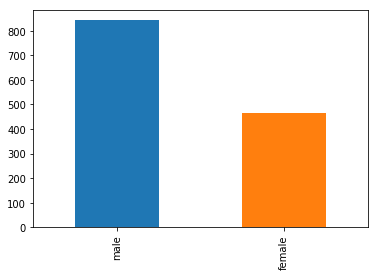

In [73]:
df.gender.value_counts().plot(kind="bar")

##### Find out total number of passengers in each passenger class

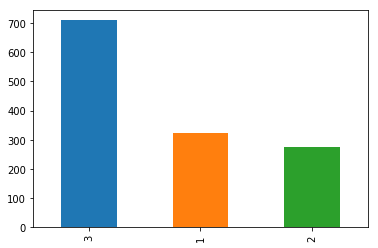

In [74]:
df.pclass.value_counts().plot(kind="bar")

##### Find out total number of Survived/Not-survived passengers

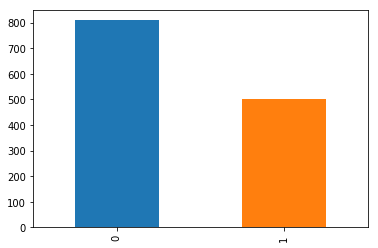

In [75]:
df.survived.value_counts().plot(kind="bar")

##### Find out total number of passengers of various age groups (0-30, 31-60 and >60)

In [76]:
ag1 = df.age[df.age<=30]
ag2 = df.age[(df.age>30) & (df.age<=60)]
ag3 = df.age[df.age>60]

In [78]:
ag1.size

872

In [79]:
ag2.size

404

In [80]:
ag3.size

33

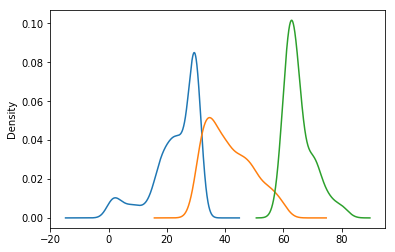

In [87]:
ag1.plot(kind="kde")
ag2.plot(kind="kde")
ag3.plot(kind="kde")
plt.show()

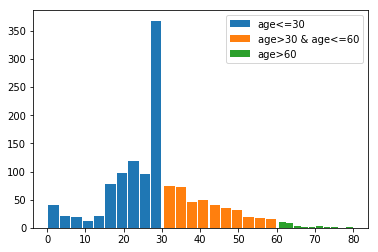

In [84]:
plt.hist(ag1,rwidth=.9,label="age<=30")
plt.hist(ag2,rwidth=.9,label="age>30 & age<=60")
plt.hist(ag3,rwidth=.9,label="age>60")
plt.legend()
plt.show()

# Grouping of columns

In [ ]:
# syntax:
# <dataframe>.groupby(<list of column names to be grouped>)

##### Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [88]:
grp = df.groupby(["pclass","embarked"])
print(grp)

In [91]:
grp.groups

{(1, 'C'): Int64Index([  9,  10,  11,  12,  16,  17,  18,  19,  22,  23,
             ...
             303, 304, 308, 312, 313, 314, 316, 317, 319, 322],
            dtype='int64', length=141),
 (1, 'Q'): Int64Index([206, 207, 208], dtype='int64'),
 (1, 'S'): Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  13,
             ...
             305, 306, 307, 309, 310, 311, 315, 318, 320, 321],
            dtype='int64', length=179),
 (2,
  'C'): Int64Index([323, 324, 391, 392, 401, 402, 465, 478, 479, 480, 481, 482, 485,
             491, 492, 493, 494, 495, 512, 513, 520, 524, 526, 531, 538, 539,
             547, 566],
            dtype='int64'),
 (2, 'Q'): Int64Index([469, 470, 472, 477, 487, 511, 562], dtype='int64'),
 (2, 'S'): Int64Index([325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
             ...
             590, 591, 592, 593, 594, 595, 596, 597, 598, 599],
            dtype='int64', length=242),
 (3,
  'C'): Int64Index([ 607,  613,  647,  648,  650,  651,  653,  

In [92]:
grp.groups.keys()

dict_keys([(1, 'C'), (1, 'Q'), (1, 'S'), (2, 'C'), (2, 'Q'), (2, 'S'), (3, 'C'), (3, 'Q'), (3, 'S')])

In [93]:
grp.groups.values()

dict_values([Int64Index([  9,  10,  11,  12,  16,  17,  18,  19,  22,  23,
            ...
            303, 304, 308, 312, 313, 314, 316, 317, 319, 322],
           dtype='int64', length=141), Int64Index([206, 207, 208], dtype='int64'), Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  13,
            ...
            305, 306, 307, 309, 310, 311, 315, 318, 320, 321],
           dtype='int64', length=179), Int64Index([323, 324, 391, 392, 401, 402, 465, 478, 479, 480, 481, 482, 485,
            491, 492, 493, 494, 495, 512, 513, 520, 524, 526, 531, 538, 539,
            547, 566],
           dtype='int64'), Int64Index([469, 470, 472, 477, 487, 511, 562], dtype='int64'), Int64Index([325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
            ...
            590, 591, 592, 593, 594, 595, 596, 597, 598, 599],
           dtype='int64', length=242), Int64Index([ 607,  613,  647,  648,  650,  651,  653,  654,  657,  658,
            ...
            1286, 1299, 1300, 1301, 1302, 1303,

### Plot number of person belonging to each group

In [96]:
grp.get_group((1, 'C')).pclass.size

141

In [98]:
for k in grp.groups.keys():
    print("Total number of persons in group::",k,grp.get_group(k).pclass.size)

Total number of persons in group:: (1, 'C') 141
Total number of persons in group:: (1, 'Q') 3
Total number of persons in group:: (1, 'S') 179
Total number of persons in group:: (2, 'C') 28
Total number of persons in group:: (2, 'Q') 7
Total number of persons in group:: (2, 'S') 242
Total number of persons in group:: (3, 'C') 101
Total number of persons in group:: (3, 'Q') 113
Total number of persons in group:: (3, 'S') 495


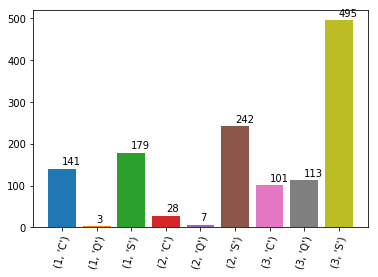

In [105]:
for k in grp.groups.keys():
#     print("Total number of persons in group::",k,grp.get_group(k).pclass.size)
    plt.bar(str(k),grp.get_group(k).pclass.size)
    plt.text(str(k),grp.get_group(k).pclass.size+10,grp.get_group(k).pclass.size)
plt.xticks(rotation=75)
plt.show()

##### Find out which age group survived

In [106]:
# This is for home work

# Sorting

In [108]:
df1 = pd.DataFrame(np.random.randint(1,100,30).reshape(15,2),columns=["A","B"])
df1

,A,B
0,21,45
1,18,64
2,41,57
3,22,48
4,50,44
5,98,99
6,57,48
7,53,44
8,88,92
9,98,78


<BarContainer object of 15 artists>

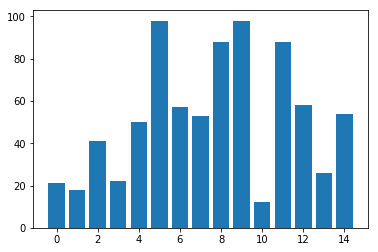

In [111]:
plt.bar(range(15),df1.A)

## df1.sort_index

In [113]:
df1.sort_index(ascending=False)

,A,B
14,54,76
13,26,31
12,58,86
11,88,74
10,12,78
9,98,78
8,88,92
7,53,44
6,57,48
5,98,99


## df1.sort_values

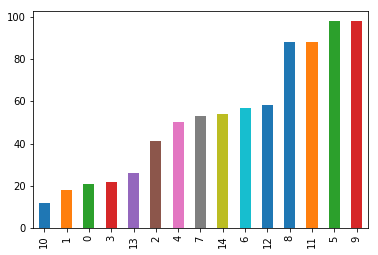

In [122]:
df1.sort_values(by="A").A.plot(kind="bar")

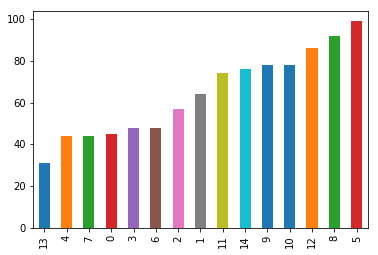

In [123]:
df1.sort_values(by="B").B.plot(kind="bar")

# Join

In [131]:
df1 = pd.DataFrame(np.random.randint(1,12,10).reshape(5,2),columns=["A","B"])
df2 = pd.DataFrame(np.random.randint(1,12,10).reshape(5,2),columns=["B","D"])

In [132]:
df1

,A,B
0,9,8
1,4,3
2,7,1
3,7,10
4,5,4


In [133]:
df2

,B,D
0,3,2
1,5,3
2,3,11
3,1,8
4,11,3


In [135]:
df1.join(df2,lsuffix="_L")

,A,B_L,B,D
0,9,8,3,2
1,4,3,5,3
2,7,1,3,11
3,7,10,1,8
4,5,4,11,3


# Merge

In [138]:
df1 = pd.DataFrame(np.random.randint(1,12,10).reshape(5,2),columns=["A","B"])
df2 = pd.DataFrame(np.random.randint(1,12,10).reshape(5,2),columns=["B","C"])

In [140]:
df1

,A,B
0,4,3
1,8,10
2,11,6
3,9,10
4,4,11


In [141]:
df2

,B,C
0,8,8
1,10,5
2,3,2
3,6,7
4,5,7


In [139]:
df1.merge(df2)

,A,B,C
0,4,3,2
1,8,10,5
2,9,10,5
3,11,6,7


In [142]:
df1.merge(df2,indicator=True)

,A,B,C,_merge
0,4,3,2,both
1,8,10,5,both
2,9,10,5,both
3,11,6,7,both


In [143]:
df1.merge(df2,how="inner",indicator=True)

,A,B,C,_merge
0,4,3,2,both
1,8,10,5,both
2,9,10,5,both
3,11,6,7,both


In [144]:
df1.merge(df2,how="left",indicator=True)

,A,B,C,_merge
0,4,3,2.0,both
1,8,10,5.0,both
2,11,6,7.0,both
3,9,10,5.0,both
4,4,11,NaN,left_only


In [145]:
df1.merge(df2,how="right",indicator=True)

,A,B,C,_merge
0,4.0,3,2,both
1,8.0,10,5,both
2,9.0,10,5,both
3,11.0,6,7,both
4,NaN,8,8,right_only
5,NaN,5,7,right_only


In [146]:
df1.merge(df2,how="outer",indicator=True)

,A,B,C,_merge
0,4.0,3,2.0,both
1,8.0,10,5.0,both
2,9.0,10,5.0,both
3,11.0,6,7.0,both
4,4.0,11,NaN,left_only
5,NaN,8,8.0,right_only
6,NaN,5,7.0,right_only
